In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report, roc_curve, auc
)

import joblib


In [2]:
# Load dataset
df = pd.read_csv("heart.csv")  # Ensure your CSV file is in the same folder
print("✅ Dataset loaded successfully!")
print(f"Shape: {df.shape}")
df.head()


✅ Dataset loaded successfully!
Shape: (1025, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
# Checking for missing values
print("\nMissing values per column:")
print(df.isnull().sum())

# Descriptive statistics
df.describe()



Missing values per column:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


/var/folders/_w/w0jf3f913c7f1qxhvz_4622c0000gn/T/ipykernel_8164/2317682819.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=df, palette='Set2')


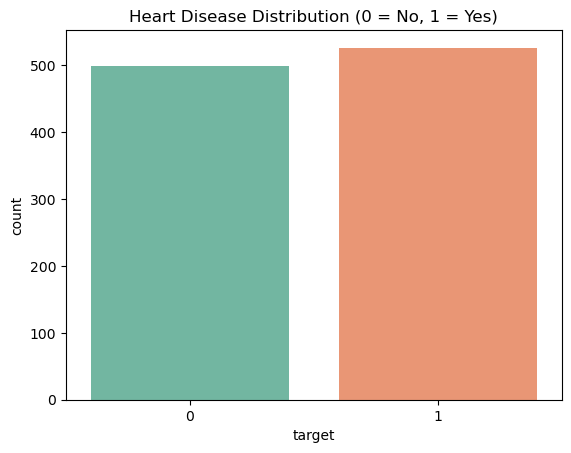

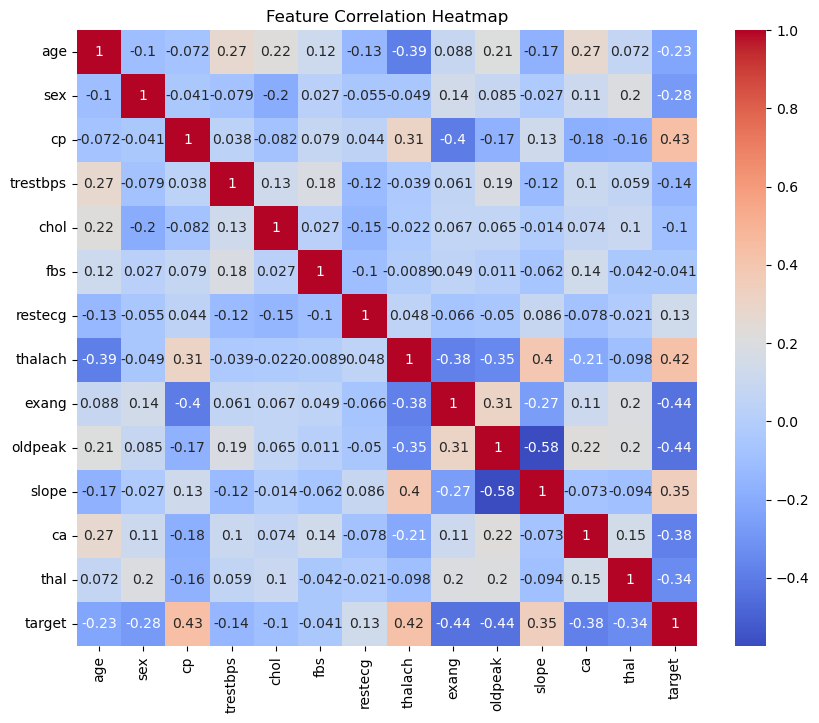

In [4]:
# Visualize class distribution
sns.countplot(x='target', data=df, palette='Set2')
plt.title("Heart Disease Distribution (0 = No, 1 = Yes)")
plt.show()

# Correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


In [5]:
X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")


Training set: (820, 13)
Test set: (205, 13)


In [6]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(max_iter=1000))
])

# Train the model
pipeline.fit(X_train, y_train)

# Predictions
y_pred = pipeline.predict(X_test)

# Evaluation
print("Accuracy:", round(accuracy_score(y_test, y_pred), 4))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8098

Confusion Matrix:
 [[70 30]
 [ 9 96]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.70      0.78       100
           1       0.76      0.91      0.83       105

    accuracy                           0.81       205
   macro avg       0.82      0.81      0.81       205
weighted avg       0.82      0.81      0.81       205



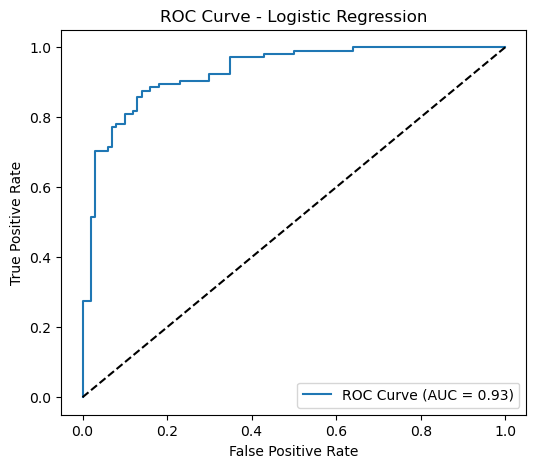

In [7]:
y_prob = pipeline.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend()
plt.show()


In [8]:
rf_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', RandomForestClassifier(random_state=42))
])

param_grid = {
    'model__n_estimators': [50, 100, 150],
    'model__max_depth': [4, 6, 8, None],
}

grid_search = GridSearchCV(rf_pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
best_pred = best_model.predict(X_test)

print("Best Parameters:", grid_search.best_params_)
print("Accuracy:", round(accuracy_score(y_test, best_pred), 4))
print("\nClassification Report:\n", classification_report(y_test, best_pred))


Best Parameters: {'model__max_depth': 8, 'model__n_estimators': 50}
Accuracy: 0.9902

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99       100
           1       0.98      1.00      0.99       105

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



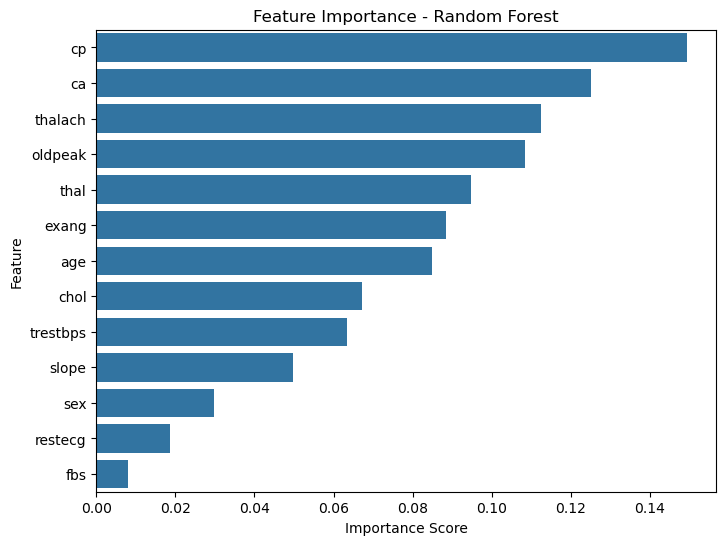

In [9]:
rf = best_model.named_steps['model']
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

plt.figure(figsize=(8,6))
sns.barplot(x=importances[indices], y=features[indices])
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()


In [11]:
# Save model
joblib.dump(best_model, "heart_disease_model.pkl")
print("💾 Model saved as 'heart_disease_model.pkl'")

# Test prediction on new data
sample = np.array([[60, 0, 3, 145, 240, 0, 1, 160, 0, 1.8, 2, 0, 3]])
prediction = best_model.predict(sample)[0]
print("Prediction:", "Heart Disease" if prediction == 1 else "No Heart Disease")




💾 Model saved as 'heart_disease_model.pkl'
Prediction: Heart Disease


/Users/ujjwallamba99/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [12]:
!pip install streamlit

In [13]:
import streamlit as st
import numpy as np
import joblib

st.title("💖 Heart Disease Prediction App")

model = joblib.load("heart_disease_model.pkl")

age = st.number_input("Age", 20, 100, 50)
sex = st.selectbox("Sex (1=Male, 0=Female)", [1, 0])
cp = st.selectbox("Chest Pain Type (0-3)", [0, 1, 2, 3])
trestbps = st.number_input("Resting Blood Pressure", 80, 200, 120)
chol = st.number_input("Cholesterol", 100, 400, 200)
fbs = st.selectbox("Fasting Blood Sugar > 120 mg/dl", [0, 1])
restecg = st.selectbox("Rest ECG", [0, 1, 2])
thalach = st.number_input("Max Heart Rate Achieved", 60, 220, 150)
exang = st.selectbox("Exercise Induced Angina", [0, 1])
oldpeak = st.number_input("ST Depression", 0.0, 6.0, 1.0)
slope = st.selectbox("Slope", [0, 1, 2])
ca = st.selectbox("Major Vessels (0-3)", [0, 1, 2, 3])
thal = st.selectbox("Thal", [0, 1, 2, 3])

if st.button("Predict"):
    data = np.array([[age, sex, cp, trestbps, chol, fbs, restecg, thalach,
                      exang, oldpeak, slope, ca, thal]])
    pred = model.predict(data)[0]
    st.success("✅ Heart Disease Detected" if pred == 1 else "🫀 No Heart Disease Detected")


2025-11-11 14:54:29.172 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-11 14:54:29.276 
  command:

    streamlit run /Users/ujjwallamba99/opt/anaconda3/lib/python3.13/site-packages/ipykernel_launcher.py [ARGUMENTS]
2025-11-11 14:54:29.276 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-11 14:54:29.281 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-11 14:54:29.281 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-11 14:54:29.282 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-11 14:54:29.282 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-11 14:54:29.282 Se